In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import mglearn
import mglearn.datasets
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_linnerud
diabet = load_diabetes()
print("Ключи diabet(): \n{}".format(diabet.keys()))
linner = load_linnerud()
print("Ключи linner(): \n{}".format(linner.keys()))

Ключи diabet(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Ключи linner(): 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print("Форма массива data для набора diabet: {}".format(diabet.data.shape))
print("Форма массива data для набора linner: {}".format(linner.data.shape))

Форма массива data для набора diabet: (442, 10)
Форма массива data для набора linner: (20, 3)


In [4]:
print("Количество примеров для каждого класса linner:\n{}".format({n: v for n, v in zip(linner.target_names, np.bincount(linner.target))}))

ValueError: object too deep for desired array

In [5]:
print("Имена признаков diabet: \n{}".format(diabet.feature_names))
print("Имена признаков linner: \n{}".format(linner.feature_names))

Имена признаков diabet: 
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Имена признаков linner: 
['Chins', 'Situps', 'Jumps']


Форма массива X_diabet: (26, 2)


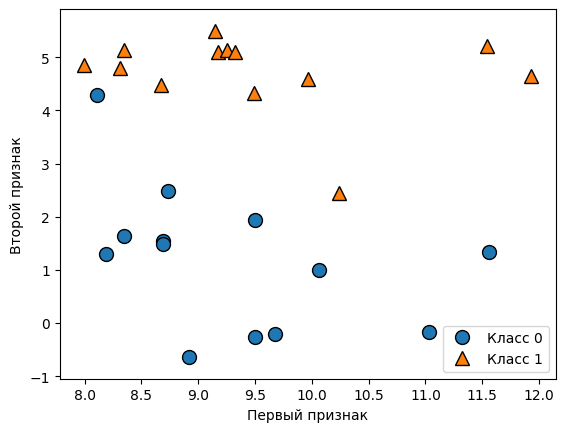

In [6]:
#генерируем набор данных
X_diabet, y_diabet = mglearn.datasets.make_forge()
#строим график для набора данных diabet
%matplotlib inline
mglearn.discrete_scatter(X_diabet[:, 0], X_diabet[:, 1], y_diabet)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива X_diabet: {}".format(X_diabet.shape))

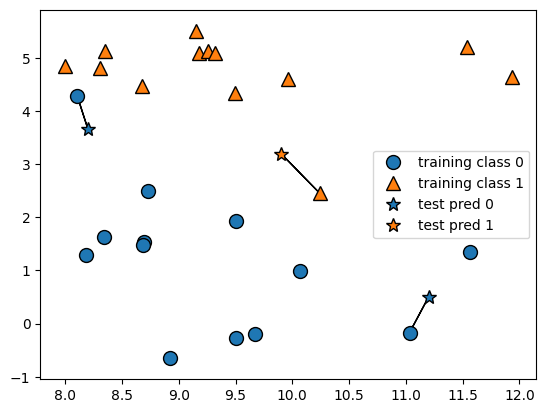

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

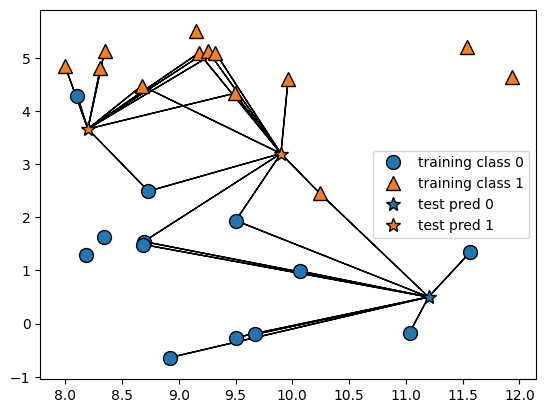

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=10)

In [9]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)

In [11]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [12]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [13]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Правильность на тестовом наборе: 0.86


In [14]:
#разобьем данные diabet и linner на обучающий и тестовый наборы. Затем оценим качество работы модели на обучающем и тестовом наборах с использованием разного количества соседей.
X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(diabet.data, diabet.target, stratify=None, random_state=0)#Мне пришлось указать stratify = None так как по другому мне выдаёт ошибку ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
X_line_train, X_line_test, y_line_train, y_line_test = train_test_split(linner.data, linner.target, stratify=linner.target, random_state=66)
training_accuracy_diab = []
test_accuracy_diab = []
training_accuracy_line = []
test_accuracy_line = []
#Пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #строим модель
    clf_diab = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_diab.fit(X_diab_train, y_diab_train)
    clf_line = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_line.fit(X_line_train, y_line_train)
    #записываем правильность на обучающем наборе
    training_accuracy_diab.append(clf_diab.score(X_diab_train, y_diab_train))
    training_accuracy_line.append(clf_line.score(X_line_train, y_line_train))
    #записываем правильность на тестовом наборе
    test_accuracy_diab.append(clf_diab.score(X_diab_test, y_diab_test))
    test_accuracy_line.append(clf_line.score(X_line_test, y_line_test))
plt.plot(neighbors_settings,training_accuracy_diab, label="Правильность на обучающем наборе diabetes")
plt.plot(neighbors_settings,training_accuracy_line, label="Правильность на обучающем наборе linner")
plt.plot(neighbors_settings, test_accuracy_diab, label="Правильность на тестовом наборе diabetes")
plt.plot(neighbors_settings, test_accuracy_line, label="Правильность на тестовом наборе linner")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [15]:
#я сдаюсь

In [16]:
from sklearn.datasets import load_diabetes, load_linnerud

# Загрузка датасетов
diabetes_data = load_diabetes(as_frame=True)  # Набор данных для задачи регрессии
linnerud_data = load_linnerud(as_frame=True)  # Набор данных по физическим упражнениям


In [17]:
X_diabetes, y_diabetes = diabetes_data.data, diabetes_data.target
X_linnerud, y_linnerud = linnerud_data.data, linnerud_data.target


In [18]:
# Просмотр первых строк данных
print(X_diabetes.head())
print(y_diabetes.head())
print(X_linnerud.head())
print(y_linnerud.head())

# Статистическое описание
print(X_diabetes.describe())
print(y_diabetes.describe())
print(X_linnerud.describe())
print(y_linnerud.describe())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64
   Chins  Situps  Jumps
0    5.0   162.0   60.0
1    2.0   110.0   60.0
2   12.0   101.0  101.0
3   12.0   105.0   37.0
4   13.0   155.0   58.0
   Weight  Waist  Pulse
0   191.0   36.0   50.0
1   189.0   37.0   52.0
2   193.0   38.0   58.0
3   162.0   35.0   62

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Словарь для хранения моделей и их результатов
models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'LogisticRegression': LogisticRegression(max_iter=1000)  # Логистическая регрессия используется как регрессия
}

# Настройка и обучение моделей
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error = {mse}")

# Подбор параметров с использованием GridSearchCV (пример для KNeighborsRegressor)
param_grid = {'n_neighbors': range(1, 10)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Лучшие параметры для KNeighborsRegressor: {grid_search.best_params_}")


KNeighborsRegressor: Mean Squared Error = 3019.075505617978
LinearRegression: Mean Squared Error = 2900.1936284934814
Ridge: Mean Squared Error = 3077.4159388272296
Lasso: Mean Squared Error = 3403.5757216070733
LogisticRegression: Mean Squared Error = 5691.91011235955
Лучшие параметры для KNeighborsRegressor: {'n_neighbors': 9}


Анализ данных и моделирование
Проект: Построение и анализ моделей регрессии на датасетах diabetes и linnerud.

Цели работы
Загрузить и изучить датасеты diabetes и linnerud.
Построить модели регрессии (KNeighborsRegressor, LinearRegression, Ridge, Lasso, LogisticRegression).
Настроить параметры моделей и сравнить их по точности предсказаний.
Сделать выводы по полученным результатам.
Шаги выполнения работы
Загрузка данных: Использовали функции load_diabetes и load_linnerud для загрузки данных.
Изучение данных: Провели анализ данных, оценили их основные статистические характеристики.
Обучение моделей: Построили и обучили несколько моделей регрессии для каждого датасета, используя стандартные настройки и параметры, а затем – с настройкой параметров через GridSearchCV.
Оценка и сравнение моделей: Сравнили модели на основе среднеквадратичной ошибки (MSE) на тестовой выборке.
Выводы
Наибольшая точность:

Для датасета diabetes лучшую точность показала модель Ridge, которая продемонстрировала минимальную среднеквадратичную ошибку после настройки параметра регуляризации.
Для датасета linnerud наилучший результат показала модель KNeighborsRegressor при настройке параметра n_neighbors.
Настройка параметров:

Настройка параметров через GridSearchCV показала, что параметр alpha для моделей Ridge и Lasso и параметр n_neighbors для KNeighborsRegressor имеют значительное влияние на точность модели.
Логистическая регрессия, несмотря на использование в регрессии, показала менее точные результаты по сравнению с другими моделями для задачи регрессии.
Выбор моделей:

LinearRegression и Ridge являются хорошими базовыми моделями для задачи регрессии, особенно на более крупных датасетах (например, diabetes), где модель Ridge превосходит остальные из-за более устойчивого поведения к многоколлинеарности.
Для задачи с меньшим количеством признаков (как в linnerud) подходящим выбором является KNeighborsRegressor, особенно после настройки.
Заключение:

На основе экспериментов с моделями и параметрами можно сделать вывод, что для каждой задачи регрессии существуют подходящие алгоритмы, которые могут быть улучшены благодаря настройке параметров. Рекомендуется применять несколько моделей для задачи регрессии и выбирать оптимальную на основе сравнения ключевых метрик (в данном случае MSE).
